# Vector Spaces

## Function Spaces

Here we explore function as elements of a vector space.  Let us consider two functions, $f(x) = \tanh(x-1)$ and $g(x) = exp(-x^2)$ in the interval $\mathcal{I} = [-3,3]$.  I can define the two norm and inner product of these functions as
$$ \|f\| = \sqrt{ \int_{-3}^3 \tanh^2(x-1) \, \mathrm{d} x }\quad \quad
 \|g\| = \sqrt{ \int_{-3}^3 \mathrm{e}^{2\,x^2} \, \mathrm{d} x }\quad \quad
 \left\langle f,\,g\right\rangle = \int_{-3}^3 \mathrm{e}^{x^2}\, \tanh(x-1) \, \mathrm{d} x $$

The angle, $\theta$ between these functions satisfies
$$ \cos(\theta) = \frac{\left\langle f,\,g\right\rangle}{\|f\|\,\|g\|} $$
Using numpy and scipy we can plot the functions and compute these quantities

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

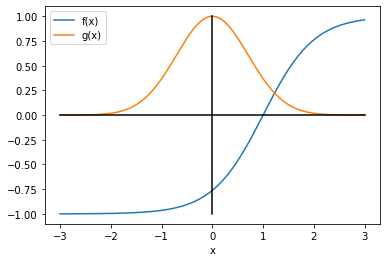

In [9]:
def f(x):
    return np.tanh(x-1)

def g(x):
    return np.exp(-x*x)

xs = np.linspace(-3,3,128)

plt.plot(xs, f(xs), "-", label="f(x)")
plt.plot(xs, g(xs), "-", label="g(x)")
plt.plot([-3,3],[0,0],"-k",[0,0],[-1,1],"-k")
plt.xlabel("x")
plt.legend()
plt.show()

In [28]:
def ff(x):
    return f(x)*f(x)

def gg(x):
    return g(x)*g(x)

def fg(x):
    return f(x)*g(x)


fnorm, _ = np.sqrt(integrate.quad(ff, -3, 3))
gnorm, _ = np.sqrt(integrate.quad(gg, -3, 3))
inner, _ = integrate.quad(fg, -3, 3)

theta = np.arccos(inner/(fnorm*gnorm))

print(f"|f| = {fnorm:0.3f}, |g| = {gnorm:0.3f}, <f,g> = {inner:0.3f}, theta = {theta:0.3f}radians")

|f| = 2.009, |g| = 1.120, <f,g> = -1.120, theta = 2.092radians


### Approximating Functions

We can approximate the functions by a vector at a set of regularly spaced points $\mathbf{x} = (x_0, x_1, \ldots, x_n)$ where $\Delta = x_{i+1}-x_{i}$
$$ \hat{\mathbf{f}} = \sqrt{\Delta}\, f(\mathbf{x}) \quad \quad \hat{\mathbf{g}} = \sqrt{\Delta} \,g(\mathbf{x}) $$
Then
$$ \int_{-3}^3 f(x)\,g(x) \mathrm{d} x \approx \sum_i f(x_i) \, g(x_i) \, \Delta = \hat{\mathbf{f}}^{T} \hat{\mathbf{g}}$$

In [72]:
xs = np.linspace(-3,3,128)
Delta = xs[1]-xs[0]
fs = np.sqrt(Delta)*f(xs)
gs = np.sqrt(Delta)*g(xs)


fnorm_approx = np.linalg.norm(fs)
gnorm_approx = np.linalg.norm(gs)
inner_approx = np.dot(fs,gs)

theta_approx = np.arccos(inner_approx/(fnorm_approx*gnorm_approx))

print(f"|f| = {fnorm_approx:0.3f}, |g| = {gnorm_approx:0.3f}, <f,g> = {inner_approx:0.3f}, theta = {theta_approx:0.3f}radians")

|f| = 2.020, |g| = 1.120, <f,g> = -1.120, theta = 2.089radians


### Fourier Series

We can change the basis function of our approximation by taking the fast Fourier transform of $\hat{\mathbf{f}}$ and $\hat{\mathbf{g}}$.  This computes the set of components
$$ \tilde{f}_i = \sum_{j=1}^n \hat{f}_j \, B_{kj} $$
where $B_{ki} = \exp(2\,\pi\, \mathrm{i}\, k\,j/n)$.
Although the vectors look very different all we have done is rotated the coordinate axis.  The norms and inner product are unchanged

(128,) (65,)
[-0.80639047+0.00000000e+00j  0.42738964+1.05408429e+00j
 -0.10346851+4.30904664e-01j -0.01511184+2.38334377e-01j
 -0.01470142+1.94671462e-01j -0.01873255+1.53744923e-01j
 -0.01825436+1.27405972e-01j -0.01841136+1.09014253e-01j
 -0.01853796+9.50563564e-02j -0.01860345+8.41831737e-02j
 -0.0186554 +7.54600162e-02j -0.01869442+6.82952930e-02j
 -0.0187242 +6.22997458e-02j -0.0187476 +5.72029590e-02j
 -0.01876628+5.28119339e-02j -0.01878141+4.89852317e-02j
 -0.01879384+4.56167951e-02j -0.01880417+4.26255388e-02j
 -0.01881285+3.99484032e-02j -0.01882021+3.75356064e-02j
 -0.0188265 +3.53473204e-02j -0.01883191+3.33512999e-02j
 -0.01883661+3.15211562e-02j -0.01884071+2.98350839e-02j
 -0.0188443 +2.82749043e-02j -0.01884747+2.68253398e-02j
 -0.01885028+2.54734551e-02j -0.01885278+2.42082231e-02j
 -0.01885501+2.30201835e-02j -0.01885701+2.19011720e-02j
 -0.01885881+2.08441045e-02j -0.01886044+1.98428017e-02j
 -0.0188619 +1.88918477e-02j -0.01886324+1.79864738e-02j
 -0.01886445+1.712

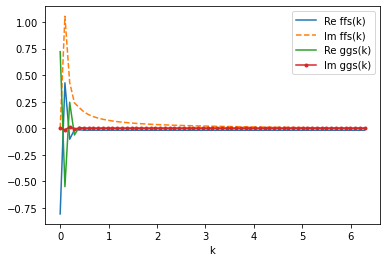

In [78]:
ffs = np.fft.rfft(fs, norm="ortho") # Use real fft
gfs = np.fft.rfft(gs, norm="ortho") # Use real fft
ks = np.linspace(0,2*np.pi, 65)
print(fs.shape, ffs.shape)
print(ffs)
plt.plot(ks, ffs.real, "-", label="Re ffs(k)")
plt.plot(ks, ffs.imag, "--", label="Im ffs(k)")
plt.plot(ks, gfs.real, "-", label="Re ggs(k)")
plt.plot(ks, gfs.imag, ".-", label="Im ggs(k)")
plt.xlabel("k")
plt.legend()
plt.show()

Note that because our functions are relatively smooth the Fourier transforms drop off rapidly.  Although this is a very different representation all we have done is change the basis.  The lengths and angles between these vectors remain unchanged

In [79]:
fnorm_approx = np.linalg.norm(ffs)
gnorm_approx = np.linalg.norm(gfs)
inner_approx = np.dot(ffs,gfs.conj)

theta_approx = np.arccos(inner_approx/(fnorm_approx*gnorm_approx))

print(f"|f| = {fnorm_approx:0.3f}, |g| = {gnorm_approx:0.3f}, <f,g> = {inner_approx}, theta = {theta_approx}radians")

TypeError: unsupported operand type(s) for *: 'complex' and 'builtin_function_or_method'